In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [11]:
#read template and scanned image
im1 = cv2.imread('images/exp4-2.jpg')
im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2RGB)

im2 = cv2.imread('images/exp4-1.jpg') 
im2= cv2.cvtColor(im2, cv2.COLOR_BGR2RGB)

error: OpenCV(4.8.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


TypeError: Image data of dtype object cannot be converted to float

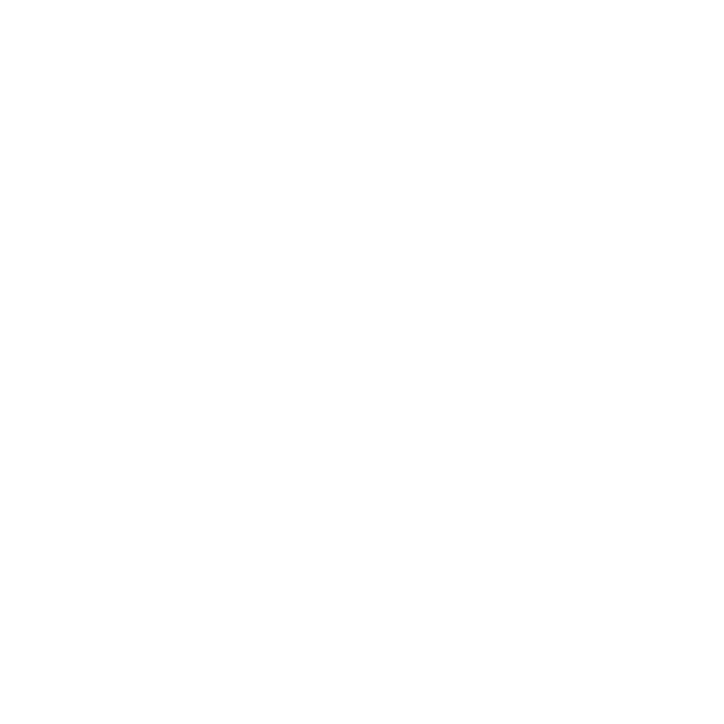

In [9]:
# display image
plt.figure(figsize=[20, 101]);
plt.subplot(121);
plt.axis('off');
plt.imshow(im1);
plt.title("Original Form")

plt.subplot(122);
plt.axis('off');
plt.imshow(im2);
plt.title("Scanned Form")

In [ ]:
# find keypoint in both image
im1_gray = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY)
im2_gray = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY)


MAX_NUM_FEATURES = 500

orb = cv2.ORB_create(MAX_NUM_FEATURES)
keypoints1, descriptors1 = orb.detectAndCompute (im1_gray, None)
keypoints2, descriptors2 = orb.detectAndCompute (im2_gray, None)

In [ ]:
im1_display = cv2.drawKeypoints(im1, keypoints1, outImage=np.array([]), color=(255, 100, 0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
im2_display = cv2.drawKeypoints(im2, keypoints2, outImage=np.array([]), color=(255, 100, 0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

In [ ]:
plt.figure(figsize=[20,10])
plt.subplot(121); plt.axis('off'); plt.imshow(im1_display); plt.title("Original Form");
plt.subplot(122); plt.axis('off'); plt.imshow(im2_display); plt.title("Scanned Form");

In [ ]:
# match keypoints in the two image
matcher = cv2.DescriptorMatcher_create(cv2.DESCRIPTOR_MATCHER_BRUTEFORCE_HAMMING)
matches = matcher.match(descriptors1, descriptors2, None)

matches = list(matches)

matches.sort(key=lambda x: x.distance, reverse=False)

numGoodMatches = int(len(matches) * 0.1)

matches = matches[:numGoodMatches]

In [ ]:
im_matches= cv2.drawMatches (im1, keypoints1, im2, keypoints2, matches, None)

plt.figure(figsize=[40,10])
plt.imshow(im_matches); plt.axis('off'); plt.title("Original Form");

In [ ]:
# find homography
points1 = np.zeros((len(matches), 2), dtype=np.float32)
points2 = np.zeros((len(matches), 2), dtype=np.float32)

for i, match in enumerate(matches):
    points1[i, :] = keypoints1[match.queryIdx].pt
    points2[i, :] = keypoints2[match.trainIdx].pt

h, mask = cv2.findHomography(points2, points1, cv2.RANSAC)

In [ ]:
# wrap image
height, width, channels = im1.shape
im2_reg = cv2.warpPerspective (im2, h, (width, height))
plt.figure(figsize=[20,10]);
plt.subplot(121); plt.imshow(iml); plt.axis('off'); plt.title("Original Form");
plt.subplot(122); plt.imshow(im2_reg); plt.axis('off'); plt.title("Scanned Form");